In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.shape

(581012, 55)

In [4]:
df.columns[df.isna().any()].tolist()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

Elevation                             0.269554
Slope                                 0.148285
Vertical_Distance_To_Hydrology        0.081664
Horizontal_Distance_To_Roadways       0.153450
Hillshade_9am                         0.035415
Hillshade_Noon                        0.096426
Hillshade_3pm                         0.048290
Horizontal_Distance_To_Fire_Points    0.108936
Wilderness_Area1                      0.203913
Wilderness_Area2                      0.048059
Wilderness_Area3                      0.066846
Wilderness_Area4                      0.323200
Soil_Type1                            0.090828
Soil_Type2                            0.118135
Soil_Type3                            0.068064
Soil_Type4                            0.099672
Soil_Type5                            0.077890
Soil_Type6                            0.112958
Soil_Type10                           0.243876
Soil_Type11                           0.035379
Soil_Type14                           0.065562
Soil_Type17  

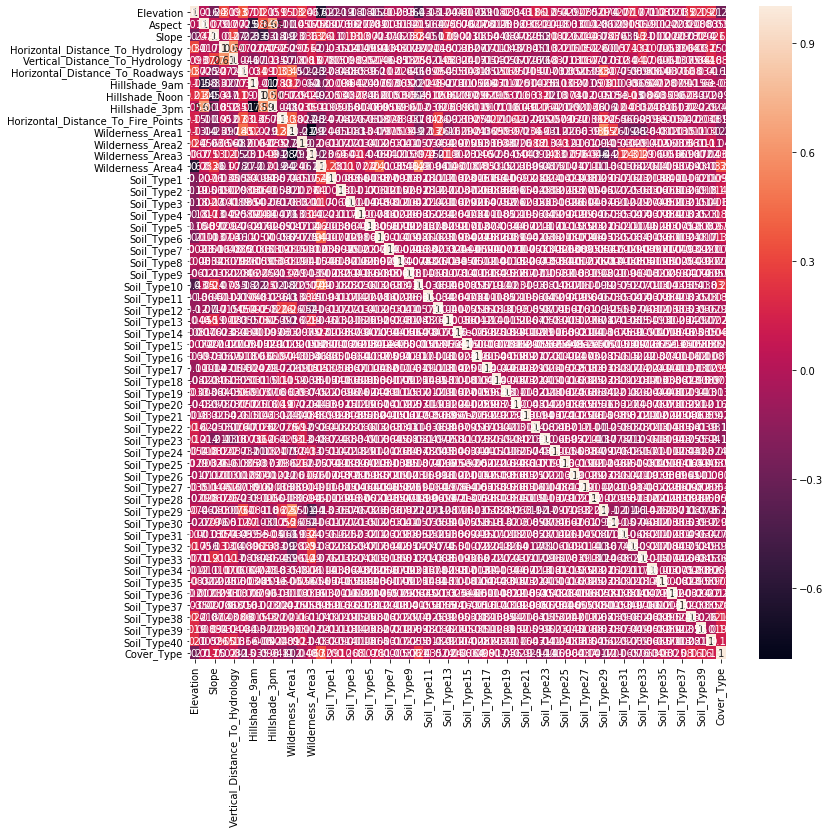

In [5]:
corr = df.corr()
cor_target = abs(corr["Cover_Type"])
plt.figure(figsize=(12,12))
sns.heatmap(data = corr, annot = True,cbar = True)

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

In [6]:
df['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

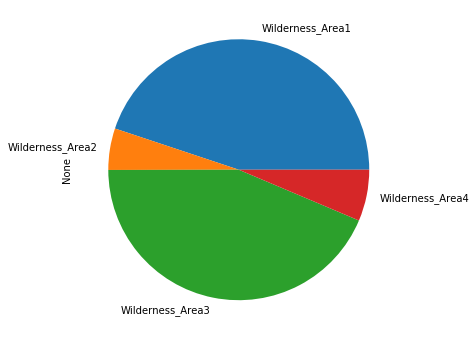

In [7]:
plt.figure(figsize=(6, 6))
df.filter(regex="Wilder").sum(axis=0).plot("pie")

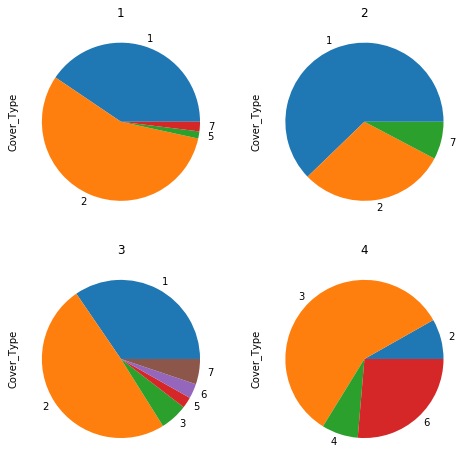

In [8]:
wilder = (df.filter(regex="Wilder") * np.array([1, 2, 3, 4])).sum(axis=1)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()
for i, ax in enumerate(axs, start=1):
    df.loc[wilder==i, "Cover_Type"].value_counts().sort_index().plot("pie", ax=ax)
    ax.set_title(i)

In [9]:
size = 10 

#create a dataframe with only 'size' features
data=df.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


C:\Users\tv5ra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


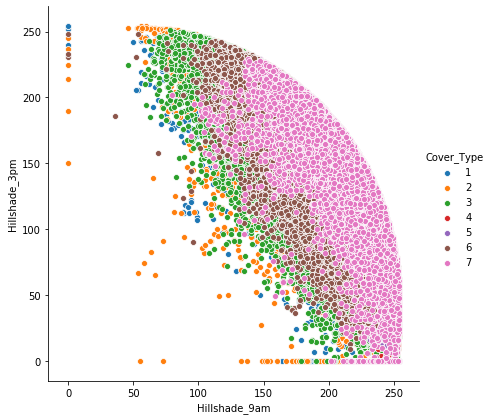

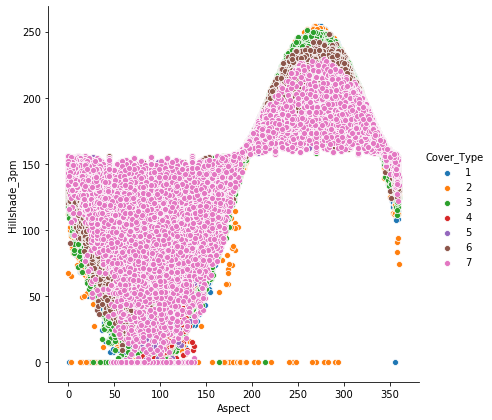

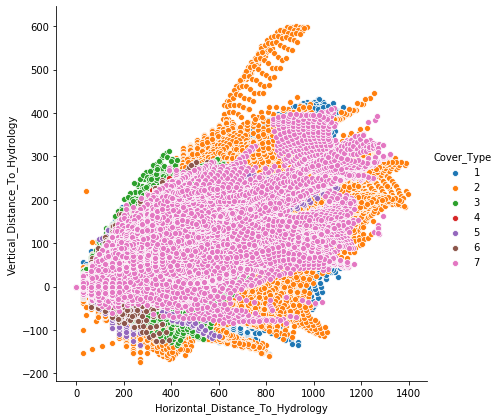

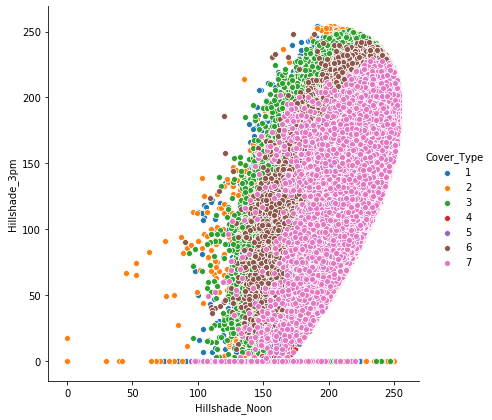

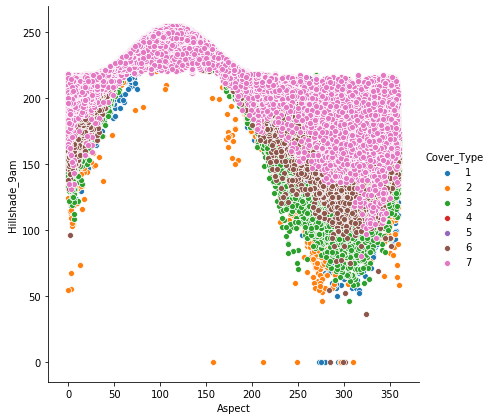

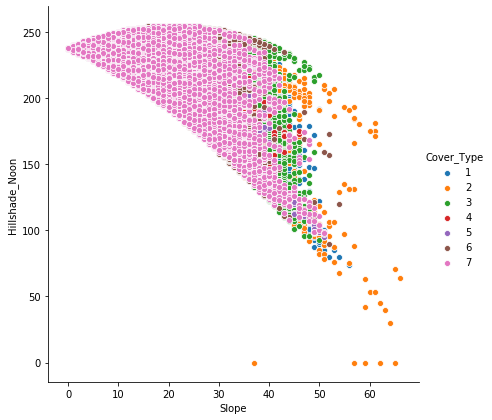

In [10]:
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [11]:
import numpy as np
import math
from multiprocessing import cpu_count
from pprint import pprint


def get_cuckoos(nest, bestnest, Lb, Ub):
    # Get cuckoos by ramdom walk
    # Levy flight
    beta = 3 / 2.
    sigma = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) / (
            math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1/beta)

    for j in range(nest.shape[0]):
        single_nest = nest[j, :]
        u = np.random.randn(single_nest.shape[0]) * sigma
        v = np.random.randn(single_nest.shape[0])
        step = u / abs(v) ** (1 / beta)
        step_size = 0.01 * step * (single_nest - bestnest)
        single_nest = single_nest + step_size * np.random.randn(single_nest.shape[0])
        single_nest = single_nest[0]
        nest[j, :] = simplebounds(single_nest, Lb, Ub)

    return nest


def empty_nests(nest, Lb, Ub, pa):
    # Replace some nests by constructing new solutions/nests
    # A fraction of worse nests are discovered with a probability pa
    n = nest.shape[0]
    K = np.random.rand(nest.shape[0], nest.shape[1]) > pa

    nestn1 = nest[np.random.permutation(n), :]
    nestn2 = nest[np.random.permutation(n), :]
    # New solution by biased/selective random walks
    stepsize = np.random.rand() * (nestn1 - nestn2)
    new_nest = nest + stepsize * K

    for i in range(new_nest.shape[0]):
        s = new_nest[i, :]
        new_nest[i, :] = simplebounds(s, Lb, Ub)

    return new_nest


def get_best_nest_cs(nest, new_nest, fitness, Y, Phi, U):
    for i in range(nest.shape[0]):
        f_new = get_fitness(new_nest[i, :], Y, Phi, U)
        if f_new <= fitness[i]:
            fitness[i] = f_new
            nest[i, :] = new_nest[i, :]
    f_min = np.min(fitness)
    index = np.where(fitness == f_min)[0]
    best_nest = nest[index, :]

    return f_min, best_nest, nest, fitness


def get_best_nest(nest, new_nest, fitness):
    for i in range(nest.shape[0]):
        f_new = get_fitness(new_nest[i, :])
        if f_new <= fitness[i]:
            fitness[i] = f_new
            nest[i, :] = new_nest[i, :]
    f_min = np.min(fitness)
    index = np.where(fitness == f_min)[0]
    best_nest = nest[index, :]

    return f_min, best_nest, nest, fitness


def get_fitness_cs(nest, Y, Phi, U):
    D_hat = U[:, nest]
    W = np.linalg.pinv(Phi.dot(D_hat)).dot(Y)
    res = Y - Phi.dot(D_hat).dot(W)
    res_T = res.T
    fitness = res_T.dot(res)

    return fitness


def get_fitness(nest):
    return (pow(nest[0], 2) + pow(nest[1] + 1, 2)) + 4


def simplebounds(single_nest, Lb, Ub):
    dimension = single_nest.shape[0]
    for j in range(dimension):
        if single_nest[j] < Lb[j]:
            single_nest[j] = Lb[j]
        elif single_nest[j] > Ub[j]:
            single_nest[j] = Ub[j]

    return single_nest


if __name__ == '__main__':
    # parameters set
    iteration = 20
    n = 20  # number of nest
    pa = 0.25  # A fraction of worse nests are discovered with a probability pa
    dim = 2  # number of cuckoo in a nest
    Lb = np.ones(dim) * np.array([-10, -10])  # low bounds of cuckoo
    Ub = np.ones(dim) * np.array([10, 10])  # high bounds of cuckoo

    nest = np.zeros((n, dim))
    for i in range(n):
        nest[i, :] = Lb + (Ub - Lb) * np.random.rand(Lb.shape[0])

    fitness = np.ones(n)
    fmin, bestnest, nest, fitness = get_best_nest(nest, nest, fitness)

    for i in range(iteration):
        new_nest = get_cuckoos(nest, bestnest, Lb, Ub)
        _, _, nest, fitness = get_best_nest(nest, new_nest, fitness)
        new_nest = empty_nests(nest, Lb, Ub, pa)
        # find best nest
        fnew, best, nest, fitness = get_best_nest(nest, new_nest, fitness)

        if fnew < fmin:
            fmin = fnew
            bestnest = best

    #print (bestnest, fmin)

[[ 9.59818364 -8.42572946]
 [ 5.21118256  2.9843343 ]
 [ 6.8640325  -3.4537453 ]
 [-8.0032185  -2.32091591]
 [-5.84866213  5.18476669]
 [-1.63483333 -9.26347694]
 [-5.37157152 -9.99987929]
 [ 5.81500688  4.62297479]
 [ 7.42431704 -8.40448628]
 [-8.89836231  0.56088592]
 [ 0.03236418 -4.56787185]
 [-2.98596823 -3.05623477]
 [-0.91359998  1.47648004]
 [ 6.21834473  6.37888598]
 [ 7.64068001  9.19089386]
 [ 3.01311398  1.84311686]
 [ 3.69087854 -6.0143012 ]
 [ 0.7546701  -2.90117616]
 [-5.37898868 -7.60677384]
 [ 2.38045688 -9.09829971]] 1.0


In [12]:
from scipy import stats
stats.spearmanr(df['Wilderness_Area1'],df['Soil_Type1'])

SpearmanrResult(correlation=-0.06535294095234849, pvalue=0.0)

In [ ]:
from sklearn.model_selection import train_test_split
y_data = df['Cover_Type'].values
X_data = df.drop('Cover_Type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
X_train.shape

In [14]:
'''from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_data, y_data)
print(model.feature_importances_)
print ("Features sorted by their importance:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), df.columns)))'''

'from sklearn import datasets\nfrom sklearn import metrics\nfrom sklearn.ensemble import ExtraTreesClassifier\nmodel = ExtraTreesClassifier()\nmodel.fit(X_data, y_data)\nprint(model.feature_importances_)\nprint ("Features sorted by their importance:")\nprint (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), df.columns)))'

In [15]:
'''from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,3)
rfe = rfe.fit(X_data, y_data)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)'''

'from sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()\nrfe = RFE(model,3)\nrfe = rfe.fit(X_data, y_data)\n# summarize the selection of the attributes\nprint(rfe.support_)\nprint(rfe.ranking_)'

In [16]:
'''from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_data,y_data)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df.columns)))'''

'from sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LinearRegression\nlr=LinearRegression()\nlr.fit(X_train,y_train)\nrfe = RFE(lr, n_features_to_select=1)\nrfe.fit(X_data,y_data)\n \nprint ("Features sorted by their rank:")\nprint (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), df.columns)))'

In [14]:
df.cov()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,78391.451413,493.040656,-508.836171,18223.860214,1522.926632,1.595913e+05,840.801856,1139.570358,633.844379,5.487965e+04,...,1.341353e+01,5.294530e+00,1.727170e-01,1.323691e+00,8.456730e-02,2.246173e-01,9.820787e+00,8.255575e+00,7.250026e+00,-105.395497
Aspect,493.040656,12524.680949,65.977321,413.326302,458.673179,4.383611e+03,-1735.454064,743.590319,2771.148834,-1.617874e+04,...,1.804534e+00,5.741742e-01,6.391597e-02,-1.401764e-01,3.653700e-03,-5.168702e-02,3.200327e-01,1.413779e-01,-7.994868e-02,2.669368
Slope,-508.836171,65.977321,56.073765,-16.882788,120.034803,-2.521030e+03,-65.590114,-78.000049,-50.401219,-1.841004e+03,...,-2.866596e-01,4.188843e-01,-4.332218e-03,-9.480205e-03,3.126607e-04,1.330605e-03,-8.732877e-02,1.067540e-01,2.338096e-02,1.550674
Horizontal_Distance_To_Hydrology,18223.860214,413.326302,-16.882788,45177.228564,7511.630097,2.387197e+04,-154.130303,196.604000,425.712403,1.460016e+04,...,7.753482e+00,5.758453e+00,7.853571e-01,-6.332196e-02,1.016522e-01,-3.273193e-02,1.477191e+00,1.033395e+00,3.805851e+00,-6.030503
Vertical_Distance_To_Hydrology,1522.926632,458.673179,120.034803,7511.630097,3398.334030,-4.215079e+03,-259.571780,-127.869009,77.873331,-5.396849e+03,...,6.646589e-01,2.607803e+00,1.847628e-01,-2.022691e-02,1.080729e-02,-9.925490e-03,-8.124258e-02,3.894131e-01,1.270921e+00,6.648231
Horizontal_Distance_To_Roadways,159591.320997,4383.611237,-2521.030488,23871.971855,-4215.078620,2.431276e+06,1433.769309,5840.027440,6333.165782,6.846315e+05,...,-3.980089e+01,-3.455624e+01,5.238951e-01,-2.664205e-01,1.684642e-01,5.759105e-01,2.009060e+01,8.018065e+00,3.048378e+00,-334.137795
Hillshade_9am,840.801856,-1735.454064,-65.590114,-154.130303,-259.571780,1.433769e+03,716.626947,5.311559,-799.495050,4.702921e+03,...,4.985047e-02,-4.614193e-01,1.006989e-02,4.249459e-02,3.013059e-03,6.262321e-03,6.531991e-02,-1.207677e-01,-5.322690e-05,-1.323964
Hillshade_Noon,1139.570358,743.590319,-78.000049,196.604000,-127.869009,5.840027e+03,5.311559,390.801387,449.649773,1.500727e+03,...,7.108064e-01,-4.560263e-01,4.476257e-02,6.601093e-03,4.593842e-03,-1.016328e-02,1.371362e-01,-2.166675e-01,-9.672927e-02,-2.662039
Hillshade_3pm,633.844379,2771.148834,-50.401219,425.712403,77.873331,6.333166e+03,-799.495050,449.649773,1464.939588,-2.431796e+03,...,9.116474e-01,-2.499543e-01,3.573765e-02,-3.593038e-02,7.282766e-04,-1.912085e-02,1.371495e-01,-1.692897e-01,-1.130621e-01,-2.581112
Horizontal_Distance_To_Fire_Points,54879.651234,-16178.737547,-1841.004188,14600.157156,-5396.849445,6.846315e+05,4702.921424,1500.727145,-2431.796409,1.753493e+06,...,-3.416446e+01,-2.094057e+01,-2.441739e+00,-6.138798e-03,-2.007598e-01,1.253371e-01,-4.221843e+00,-6.656787e-01,1.437742e+00,-201.448422


In [15]:
from scipy import stats
import math
import operator
from itertools import islice
def findMaximumSpearmanCoeff(data):
    spearmanCoeff = []
    col = []
    for column in data.columns:
        col.append(column)
        spearmanCoeff.append(stats.spearmanr(data[column],data['Cover_Type']))
    final_cols = {}
    for c,coeff in zip(col,spearmanCoeff):
        for x in coeff:
            if(x!=0.0):
                #print(c,': Cover_Type ',x)
                final_cols.update({c:x})
    
    #print(final_cols)
    final_cols = sorted(final_cols.items(), key=operator.itemgetter(1),reverse = True)
    return(final_cols)

In [16]:
Subset1 = findMaximumSpearmanCoeff(df)
print(Subset1)

[('Cover_Type', 1.0), ('Soil_Type8', 0.7591519101711487), ('Soil_Type25', 0.7434899231225643), ('Wilderness_Area4', 0.37599904642832177), ('Soil_Type10', 0.2683814938054507), ('Soil_Type4', 0.17192518259175216), ('Soil_Type2', 0.15868469909557212), ('Slope', 0.15107849350928643), ('Soil_Type6', 0.14606853464932618), ('Soil_Type3', 0.11269300716829757), ('Soil_Type1', 0.11019936301922678), ('Vertical_Distance_To_Hydrology', 0.09568253433742367), ('Soil_Type17', 0.08404648068362636), ('Soil_Type11', 0.0813307615890651), ('Soil_Type5', 0.081248333867566), ('Soil_Type12', 0.061981101254820245), ('Soil_Type13', 0.060995697506045866), ('Soil_Type14', 0.0521285636741094), ('Soil_Type15', 0.0031508346741428595), ('Soil_Type7', 2.5456457253410843e-05), ('Soil_Type9', 4.2604454503484037e-10), ('Soil_Type39', 7.741046265931729e-13), ('Soil_Type38', 1.0153473552686608e-14), ('Soil_Type40', 7.207944524900865e-22), ('Hillshade_9am', 8.46757895184468e-23), ('Soil_Type36', 3.090535425743028e-26), ('So

In [17]:
df_subset = pd.DataFrame(list(Subset1))
df_subset

,0,1
0,Cover_Type,1.000000e+00
1,Soil_Type8,7.591519e-01
2,Soil_Type25,7.434899e-01
3,Wilderness_Area4,3.759990e-01
4,Soil_Type10,2.683815e-01
5,Soil_Type4,1.719252e-01
6,Soil_Type2,1.586847e-01
7,Slope,1.510785e-01
8,Soil_Type6,1.460685e-01
9,Soil_Type3,1.126930e-01


In [18]:
df_subset_spearman = df[['Soil_Type8','Soil_Type25','Wilderness_Area4','Soil_Type10','Soil_Type4','Soil_Type2',
                         'Slope','Soil_Type6','Soil_Type3','Soil_Type1','Vertical_Distance_To_Hydrology',
                         'Soil_Type17','Soil_Type11','Soil_Type5','Soil_Type12','Soil_Type13','Soil_Type14',
                         'Soil_Type15','Soil_Type7','Soil_Type9','Soil_Type39','Soil_Type38','Soil_Type40',
                         'Hillshade_9am','Soil_Type36','Soil_Type28','Cover_Type']]
df_subset_spearman.shape

(581012, 27)

In [22]:
# Joining the data from both csv files


df_assg1 = pd.read_csv("foresttrain.csv")
df_assg1.head()
y_data=df_assg1[['Cover_Type']]
y=pd.DataFrame(df_assg1[['Cover_Type']])
df_assg1=df_assg1.drop(['Cover_Type'],axis=1)
column_names=list(df_assg1.columns.values) 

In [19]:
df_subset_spearman.head()

,Soil_Type8,Soil_Type25,Wilderness_Area4,Soil_Type10,Soil_Type4,Soil_Type2,Slope,Soil_Type6,Soil_Type3,Soil_Type1,...,Soil_Type15,Soil_Type7,Soil_Type9,Soil_Type39,Soil_Type38,Soil_Type40,Hillshade_9am,Soil_Type36,Soil_Type28,Cover_Type
0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,221,0,0,5
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,220,0,0,5
2,0,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,234,0,0,2
3,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,238,0,0,2
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,220,0,0,5


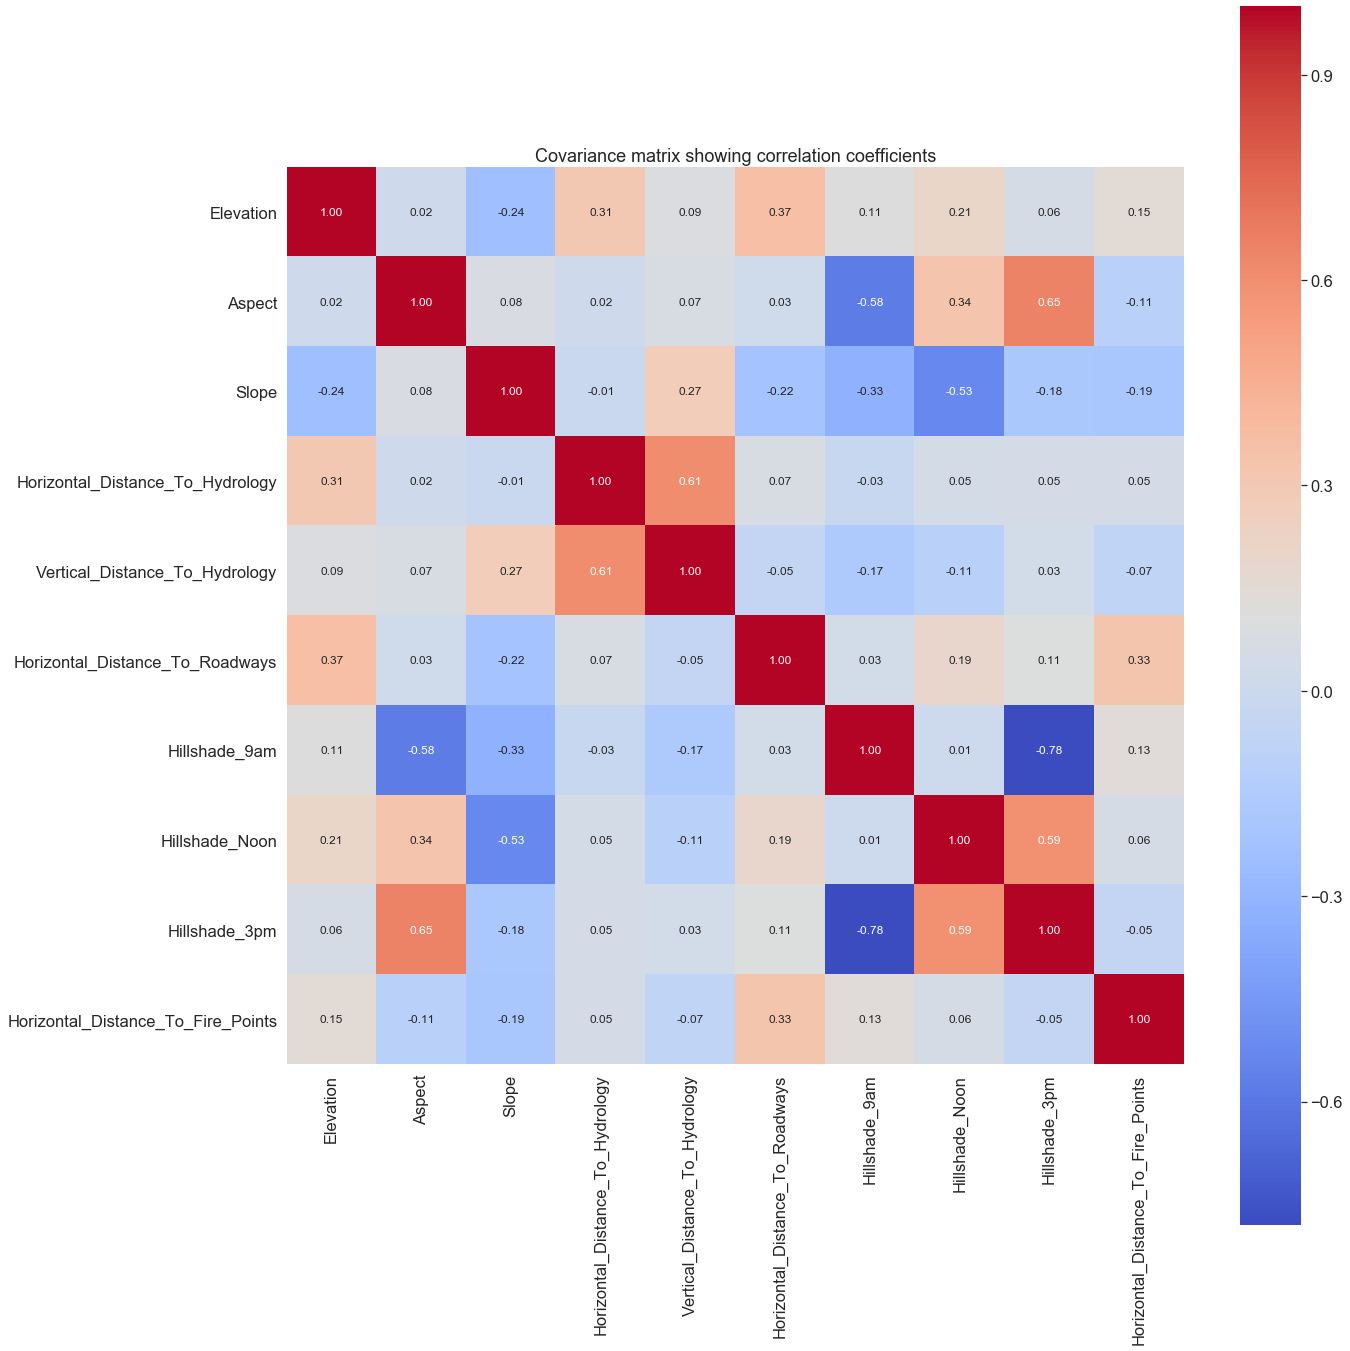

In [20]:
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [21]:
imp_features = cor_target[cor_target>0.03]
imp_features

Elevation                             0.269554
Slope                                 0.148285
Vertical_Distance_To_Hydrology        0.081664
Horizontal_Distance_To_Roadways       0.153450
Hillshade_9am                         0.035415
Hillshade_Noon                        0.096426
Hillshade_3pm                         0.048290
Horizontal_Distance_To_Fire_Points    0.108936
Wilderness_Area1                      0.203913
Wilderness_Area2                      0.048059
Wilderness_Area3                      0.066846
Wilderness_Area4                      0.323200
Soil_Type1                            0.090828
Soil_Type2                            0.118135
Soil_Type3                            0.068064
Soil_Type4                            0.099672
Soil_Type5                            0.077890
Soil_Type6                            0.112958
Soil_Type10                           0.243876
Soil_Type11                           0.035379
Soil_Type14                           0.065562
Soil_Type17  

In [22]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
df_subset_2 = df_assg1[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']]

In [10]:

import pandas as pd # storing and mnipulating the dataset
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import warnings  
import pylab as pl
import pdb
warnings.filterwarnings("ignore") # to not display any warnings generated 
import numpy as np # for array computations
from sklearn.preprocessing import StandardScaler

In [23]:
column_names_samples=column_names.remove('Id')
len(column_names)

54

In [24]:
import random 
main_list_x=list()
main_list_y=list()
ratio=0.20
scaler = StandardScaler()

for i in range(5):
    sample_x = list()
    sample_y = list()
    n_sample = round(len(df_assg1) * ratio)
    while len(sample_x) < n_sample:
        index = random.randrange(len(df_assg1))
        sample_x.append(df_assg1.iloc[index,1:])
        sample_y.append(y.iloc[index,:])
    
    scaler.fit(sample_x)
    sample_x=scaler.transform(sample_x)
    main_list_x.append(sample_x)
    main_list_y.append(sample_y)
    
final_samples=list()

for i in range(5):
    final_samples.append(pd.DataFrame(main_list_x[i],columns=column_names))
    #final_samples[i].drop(['Id'],axis=1,inplace=True)

In [17]:
models=['Logistic Regression','Decision Tree','KNN','Ensemble']

In [25]:
x_sample=final_samples[0]
y_sample=main_list_y[0]
for i in range(1,5):
    x_sample=np.vstack((x_sample,final_samples[i]))
    y_sample=np.vstack((y_sample,main_list_y[i]))

In [26]:
x_sample=pd.DataFrame(x_sample, columns=column_names)

In [31]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
coef_list=list()
for i in range(5):
    clf.fit(final_samples[i],main_list_y[i])
    coef_list.append(clf.coef_)

In [32]:
#selected_attributes=list()
attributes=list()
for i in range(5):
    for j in range(54):
        if coef_list[i][j]!=0:
            attributes.append(column_names[j])
    #selected_attributes.append(attributes)

In [33]:
from collections import Counter
count=Counter(attributes)
# Select Attributes based on how many times they have occured
d = dict((k, v) for k, v in count.items() if v >= 1)
df1=df_assg1[d.keys()]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y_sample, test_size=0.33, random_state=42)

In [35]:
accuracy2=list()

In [36]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=57,max_iter=10)
clf2 = DecisionTreeClassifier(random_state=57)
clf3 = KNeighborsClassifier(n_neighbors=3)
voting_clf = VotingClassifier(
estimators = [('lr', clf1), ('dt', clf2), ('knn',clf3)],voting = 'soft',weights=[1,2,2])
for clf, label in zip([clf1, clf2, clf3, voting_clf], ['Logistic Regression', 'Decision Tree', 'knn', 'Ensemble']):
            scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
            accuracy2.append(scores.mean()*100)
            print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
            print("done")

Accuracy: 0.15 (+/- 0.01) [Logistic Regression]
done
Accuracy: 0.15 (+/- 0.01) [Decision Tree]
done
Accuracy: 0.15 (+/- 0.01) [knn]
done
Accuracy: 0.15 (+/- 0.01) [Ensemble]
done


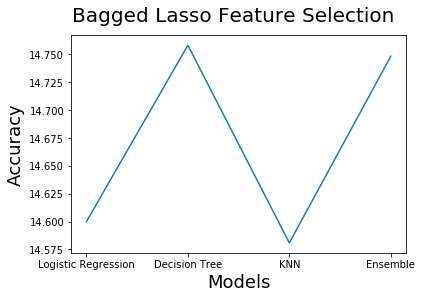

In [37]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.suptitle('Bagged Lasso Feature Selection', fontsize=20)
x = np.array([0,1,2,3])
y = accuracy2
my_xticks = models
plt.xticks(x, my_xticks)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(x, y)
plt.show()

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)

principalComponents=list()
for i in range(5):
    principalComponents.append(pca.fit_transform(final_samples[i]))
    


In [39]:
pc=principalComponents[0]
y=main_list_y[0]
for i in range(1,5):
    pc=np.vstack((pc,principalComponents[i]))
    y=np.vstack((y,main_list_y[i]))

In [40]:

final_principal_components = pd.DataFrame(pc)
#y_final=pd.DataFrame(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_principal_components, y_sample, test_size=0.33, random_state=42)

In [42]:
accuracy3=list()

In [43]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=57,max_iter=10)
clf2 = DecisionTreeClassifier(random_state=57)
clf3 = KNeighborsClassifier(n_neighbors=3)
voting_clf = VotingClassifier(
estimators = [('lr', clf1), ('dt', clf2), ('knn',clf3)],voting = 'soft',weights=[1,2,2])
for clf, label in zip([clf1, clf2, clf3, voting_clf], ['Logistic Regression', 'Decision Tree', 'knn', 'Ensemble']):
            scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
            accuracy3.append(scores.mean()*100)
            print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
            print("done")

Accuracy: 0.41 (+/- 0.00) [Logistic Regression]
done
Accuracy: 0.64 (+/- 0.01) [Decision Tree]
done
Accuracy: 0.65 (+/- 0.01) [knn]
done
Accuracy: 0.66 (+/- 0.01) [Ensemble]
done


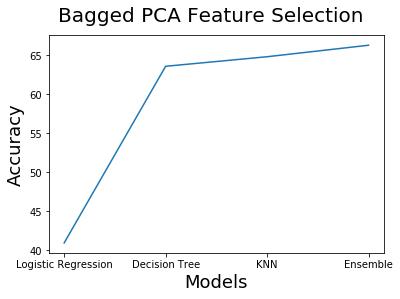

In [44]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.suptitle('Bagged PCA Feature Selection', fontsize=20)
x = np.array([0,1,2,3])
y = accuracy3
my_xticks = models
plt.xticks(x, my_xticks)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(x, y)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_subset_2, y_data, test_size=0.33, random_state=42)


In [46]:
accuracy4=list()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=57,max_iter=10)
clf2 = DecisionTreeClassifier(random_state=57)
clf3 = KNeighborsClassifier(n_neighbors=3)
voting_clf = VotingClassifier(
estimators = [('lr', clf1), ('dt', clf2), ('knn',clf3)],voting = 'soft',weights=[1,2,2])
for clf, label in zip([clf1, clf2, clf3, voting_clf], ['Logistic Regression', 'Decision Tree', 'knn', 'Ensemble']):
            scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
            accuracy4.append(scores.mean()*100)
            print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
            print("done")

Accuracy: 0.23 (+/- 0.01) [Logistic Regression]
done
Accuracy: 0.72 (+/- 0.01) [Decision Tree]
done
Accuracy: 0.79 (+/- 0.01) [knn]
done
Accuracy: 0.76 (+/- 0.01) [Ensemble]
done


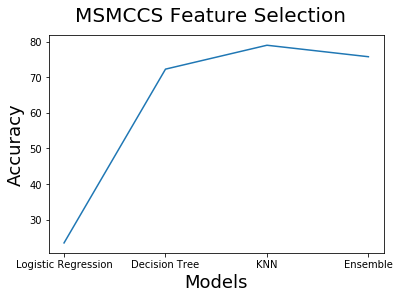

In [48]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.suptitle('MSMCCS Feature Selection', fontsize=20)
x = np.array([0,1,2,3])
y = accuracy4
my_xticks = models
plt.xticks(x, my_xticks)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(x, y)
plt.show()

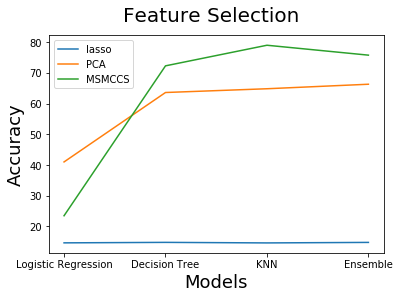

In [51]:
fig = plt.figure()
fig.suptitle('Feature Selection', fontsize=20)
x = np.array([0,1,2,3])
y = accuracy2
my_xticks = models
plt.xticks(x, my_xticks)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(x, y)

plt.plot(x, accuracy3)
plt.plot(x, accuracy4)


plt.legend(['lasso', 'PCA','MSMCCS'], loc='upper left')

plt.show()